<a href="https://colab.research.google.com/github/coder-2011/MLProjects/blob/main/Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
import torchvision as tv

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_dataset/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_dataset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_dataset/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_dataset/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_dataset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_dataset/MNIST/raw

2


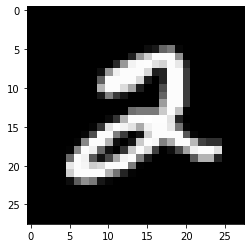

In [ ]:
trainingData = tv.datasets.MNIST('MNIST_dataset', train=True, download=True, transform=tv.transforms.ToTensor())
testingData = tv.datasets.MNIST('MNIST_dataset', train=False, download=True, transform=tv.transforms.ToTensor())
trainingData[0][0].shape
print(trainingData[5][1])
plt.imshow(trainingData[5][0].squeeze(), cmap="gray")
trainingLoader = torch.utils.data.DataLoader(trainingData, batch_size=200, shuffle=True)
testingLoader = torch.utils.data.DataLoader(testingData, batch_size=200)

In [ ]:
for batchx, batchy in trainingLoader:
  print(batchx.shape)
  print(batchy.shape)
  break


torch.Size([200, 1, 28, 28])
torch.Size([200])


In [ ]:
class SoftMaxClassifier(torch.nn.Module):
  def __init__(self):
      super().__init__()
      self.flattenLayer = torch.nn.Flatten()

      self.linear = torch.nn.Linear(28*28, 250)
      self.sigmoid = torch.nn.Sigmoid()
      self.secondLinearLayer = torch.nn.Linear(250, 10)
      self.softMax = torch.nn.Softmax(dim=1)

  def forward(self, x):
      x = self.flattenLayer(x)
      hiddenValues = self.sigmoid(self.linear(x))
      logits = self.secondLinearLayer(hiddenValues)
      probability = self.softMax(logits)
      return logits, probability

model = SoftMaxClassifier()
model(batchx)
# Classifer

RuntimeError: ignored

In [ ]:
# def lossfn(y_predictions, y_true):

#   return (y_predictions-y_true).pow(2).sum()

lossfn = torch.nn.CrossEntropyLoss()



def getPredictions(prob):

  return prob.max(dim=1)[1]

print(getPredictions(model(batchx)[1]))

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
loss_history = []

for i in range(20):
  epoch_loss = 0
  epoch_correct = 0
  for batchx, batchy in trainingLoader:

    optimizer.zero_grad()

    logits, probability = model(batchx)

    current_loss = lossfn(logits, batchy)

    epoch_loss += current_loss.item()

    epoch_correct += getPredictions(probability).eq(batchy).sum()

    current_loss.backward()

    optimizer.step()

  loss_history.append(epoch_loss)
  if i % 1 == 0:
    print(f'epoch: {i}, epoch loss: {epoch_loss}, epoch accuracy:{epoch_correct/len(trainingData)}')

plt.plot(loss_history)

In [ ]:


epoch_loss = 0
epoch_correct = 0
for batchx, batchy in testingLoader:


  logits, probability = model(batchx)

  current_loss = lossfn(logits, batchy)

  epoch_loss += current_loss.item()

  epoch_correct += getPredictions(probability).eq(batchy).sum()

print(f'epoch: {i}, epoch loss: {epoch_loss}, epoch accuracy:{epoch_correct/len(testingData)}')



In [ ]:
probability_y = model(x_data)
binary_y = getPredictions(probability_y)
cm = metrics.confusion_matrix(y_data, binary_y)
print(binary_y)
print(cm)
cmd = metrics.ConfusionMatrixDisplay(cm)
cmd.plot()